# Logistic Regression

Logistic Regression is not a regression but a classification algorithm. It also happens to be one of the major stepping stones towards Neural Networks and therefore interesting to learn more about. This notebook demonstrates how Logistic Regression works.


# Data

We can use a classifier on the Wine data set by converting the target variable to a boolean: $y = 1$ if the quality >= 6 or 0 otherwise. The easiest way is to create a new column for our label whether the wine is 'good'.

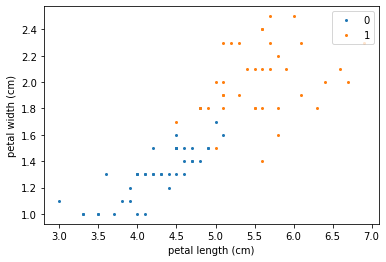

In [1]:
from ml import *
from scipy.special import expit as logit # is more stable in case of overflows
data = iris_classify()
data.plot2d()

In [2]:
# first we plot it so that the plot shows alcohol and pH and then add a bias.
data.bias = 1
data.column_y = True

# Cost Function and Update Rule

To estimate $\theta$ we use the vectorized version of the cost function:

$$ J(\theta) = -\frac{1}{m} \left[ y^T \cdot log \left( logit( X \cdot \theta ) \right) + (1 - y^T) \cdot log \left( 1 - logit( X \cdot \theta ) \right) \right] $$

and update rule:

$$ \theta := \theta - \frac{\alpha}{m} \cdot X^T \cdot (\ logit(X \cdot \theta) - y )$$

Next we write a function `fit_model` that uses Batch Gradient Descent to estimate $\theta$ by repeatedly applying the update rule for some number of iterations. We start by defining the hypothesis $h(X, \theta)$. Remember that the result of the logit can be interpreted as the likelihood that $y=1$.

In [3]:
def J(X, y, 𝜃):
    return - 1 / len(X) * (y.T @ np.log(logit(X @ 𝜃)) + (1 - y.T) @ np.log(1- logit(X @ 𝜃)))

In [4]:
def h(X, 𝜃):
    return logit(X @ 𝜃)

In [5]:
"""
Updates parameters theta for #iterations using the logistic regression update rule
X: n x m matrix containing the input for n training examples, each having m features
y: n x 1 matrix containing the correct class {0,1} for the n training examples
alpha: learning rate
iterations: number of iterations
returns: theta
"""
def fit_model(X, y, alpha=0.03, iterations=50000):
    m = X.shape[1]            # the number of features
    𝜃 = np.zeros((m, 1))      # vector theta with a weight for every feature
    for iter in range(iterations):
        𝜃 -= (alpha / m) * X.T @ ( h(X, 𝜃) - y )
        if (iter + 1) % 10000 == 0:
            print(J(X, y, 𝜃))
    return 𝜃

# Interpreting the coefficients

Now, we'll fit the model and look at the values for $\theta$. Our analysis of the logistic function told us that values of $\theta^T \cdot x > 0$ contribute to predicting class 1 and values of $\theta^T \cdot x < 0$ contribute to predicting class 1. Therefore, we can see from the sign of $\theta_1$ that a higher alcohol percentage is associated with good wine and from the sign of $\theta_2$ that a higher pH-value is associated with bad wine.

In [8]:
data.train_X

array([[1. , 4.9, 1.8],
       [1. , 4. , 1. ],
       [1. , 4.6, 1.3],
       [1. , 4.6, 1.5],
       [1. , 5.8, 1.6],
       [1. , 5.6, 2.4],
       [1. , 4.1, 1. ],
       [1. , 5.3, 2.3],
       [1. , 4.3, 1.3],
       [1. , 6. , 2.5],
       [1. , 3.8, 1.1],
       [1. , 4.5, 1.3],
       [1. , 4.7, 1.4],
       [1. , 3.7, 1. ],
       [1. , 4.8, 1.8],
       [1. , 4.2, 1.5],
       [1. , 5.8, 1.8],
       [1. , 6.1, 2.3],
       [1. , 3.9, 1.2],
       [1. , 4.4, 1.2],
       [1. , 4.5, 1.5],
       [1. , 5. , 1.7],
       [1. , 4.5, 1.6],
       [1. , 4.7, 1.5],
       [1. , 5.1, 1.9],
       [1. , 5.6, 2.4],
       [1. , 5.6, 2.1],
       [1. , 4.8, 1.8],
       [1. , 6.9, 2.3],
       [1. , 4.2, 1.3],
       [1. , 5.6, 1.8],
       [1. , 5.7, 2.3],
       [1. , 6.1, 1.9],
       [1. , 5.3, 1.9],
       [1. , 4.5, 1.5],
       [1. , 5.1, 2.3],
       [1. , 6.3, 1.8],
       [1. , 5.2, 2.3],
       [1. , 5.8, 2.2],
       [1. , 6.6, 2.1],
       [1. , 4.5, 1.5],
       [1. , 5.9

In [6]:
𝜃 = fit_model(data.train_X, data.train_y)
𝜃

[[0.11471367]]
[[0.11159872]]
[[0.11096695]]
[[0.11079616]]
[[0.11074428]]


array([[-40.72286222],
       [  4.82568771],
       [ 10.32101393]])

# Evaluation

# Prediction function

To use the trained model, we need a `predict` function that classifies a set of cases `X`. Since the outcome of the logistic function can be interpreted as the likelihood that $P(y = 1| x; \theta)$, we choose to return `True` if our model returns an estimation greater or equal than `0.5` and thus indicates $y=1$, or `False` otherwise indicating $y=0$.

In [7]:
"""
X: n x m matrix containing the input for n training examples, each having m features
theta: m x 1 matrix containing the coefficients for the model
Returns true if the hypothesis for a given x >= 0.5 otherwise false
"""
def predict(X, 𝜃):
    return h(X, 𝜃) >= 0.5

We can then evaluate our model by comparing the predictions on a set of test cases for which we verify if the prediction equals the True label.

In [8]:
"""
X: n x m matrix containing the input for n training examples, each having m features
y: n x 1 matrix containing the correct class {0,1} for the n training examples
theta: m x 1 matrix containing the coefficients for the model
Returns percentage correctly predicted cases in X
"""
def evaluate(𝜃, X, y):
    return sum( predict(X, 𝜃) == y ) / len(X)

The model has an accuracy of 94%, in other words, the percentage of flowers for which correctly predicts whether it is class 0 or 1.

In [9]:
evaluate(𝜃, data.train_X, data.train_y)

array([0.9375])